In [1]:
import sys

PACKAGE_PARENT = '../../../'
sys.path.append(PACKAGE_PARENT)

from alphaslime.agents.RL.policygrad.torch.ppo import PPOAgent
import pposp_configs_cont as PPOCONFIGS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# load configurations
CONST = PPOCONFIGS.CONST
agent_config = PPOCONFIGS.agent_config
env = PPOCONFIGS.env

In [12]:
from alphaslime.evaluate.eval_agents import EvaluateGameSA

# create agent
agent_trained = PPOAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
act_path = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_actor.pt'
crt_path = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_critic.pt'
paths = [act_path, crt_path]
# paths = ['../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_actor.pt', '../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_critic.pt']
agent_trained.load_model(paths)


eps = 1000
base_dir_path = "./"
RENDER = False
gym_evaluator = EvaluateGameSA(agent_trained, env, base_dir_path, render=RENDER)
running_avg_len = 100
# running_avg_len = 2


# evaulate agent
rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len, save=False)




Actor Device used: cpu
Critic Device used: cpu
... loading models ...


100%|██████████| 1000/1000 [09:50<00:00,  1.69it/s]


average reward per episode : -4.78
average reward per episode= -4.78


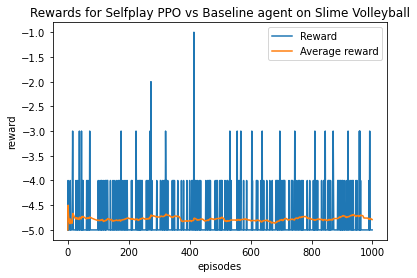

In [17]:
print("average reward per episode :", sum(rewards) / len(rewards))

import numpy as np
import matplotlib.pyplot as plt

rewards = np.array(rewards)
plt.plot(rewards, label='Reward')
plt.plot(avg_rewards_array, label='Average reward')
plt.legend(bbox_to_anchor=(1., 1)) 
plt.xlabel('episodes')
plt.ylabel('reward')
plt.title('Rewards for Selfplay PPO vs Baseline agent on Slime Volleyball')
print('average reward per episode= {}'.format(np.mean(rewards)))
plt.show()

In [7]:
# load training data

import pickle

data_path_1 = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_1.56_data.pkl'
data_path_2 = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_data.pkl'

with open(data_path_1, 'rb') as f:
    data1 = pickle.load(f)
with open(data_path_2, 'rb') as f:
    data2 = pickle.load(f)

train_rewards_1 = data1['rewards']
train_rewards_2 = data2['rewards']

train_rewards = []
train_rewards.extend(train_rewards_1)
train_rewards.extend(train_rewards_2)



train_avg_rewards_1 = data1['avg_rewards']
train_avg_rewards_2 = data2['avg_rewards']

train_avg_rewards = []
train_avg_rewards.extend(train_avg_rewards_1)
train_avg_rewards.extend(train_avg_rewards_2)


4.58
average reward per episode= 2.566333333333333


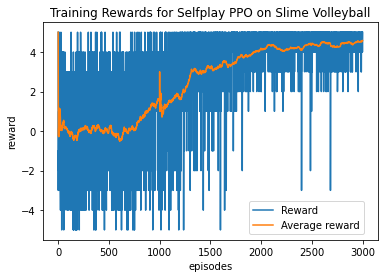

In [15]:
print(train_avg_rewards[-1])
train_rewards = np.array(train_rewards)
plt.plot(train_rewards, label='Reward')
plt.plot(train_avg_rewards, label='Average reward')
plt.title('Training Rewards for Selfplay PPO on Slime Volleyball')
# plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.legend(bbox_to_anchor=(.6, .2)) 
plt.xlabel('episodes')
plt.ylabel('reward')
print('average reward per episode= {}'.format(np.mean(train_rewards)))
plt.show()

In [5]:
# Selfplay VS Selfplay
from alphaslime.evaluate.eval_agents import EvaluateGameMA

agent_right = PPOAgent(CONSTANTS=CONST, config=agent_config)
agent_left = PPOAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
act_path_right = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_actor.pt'
crt_path_right = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_critic.pt'
paths_right = [act_path_right, crt_path_right]

act_path_left = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_1.56_model_actor.pt'
crt_path_left= '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_1.56_model_critic.pt'
paths_left = [act_path_left, crt_path_left]


agent_right.load_model(paths_right)
agent_left.load_model(paths_left)


eps = 1
base_dir_path = "./"
RENDER = True
gym_evaluator = EvaluateGameMA(agent_right, agent_left, env, base_dir_path, render=RENDER, time_delay=0)
running_avg_len = 100
# running_avg_len = 2


# evaulate agent
rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len)



Actor Device used: cpu
Critic Device used: cpu
Actor Device used: cpu
Critic Device used: cpu
... loading models ...
... loading models ...


100%|██████████| 1/1 [00:13<00:00, 13.50s/it]


-5
average reward per episode= -4.78


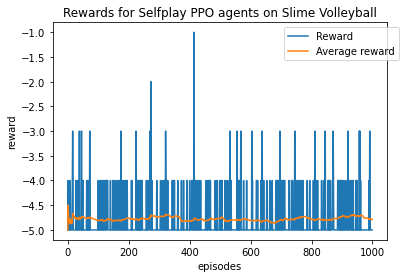

In [16]:
print(rewards[-1])
rewards = np.array(rewards)
plt.plot(rewards, label='Reward')
plt.plot(avg_rewards_array, label='Average reward')
plt.title('Rewards for Selfplay PPO agents on Slime Volleyball')
plt.legend(bbox_to_anchor=(1.05, 1)) 
plt.xlabel('episodes')
plt.ylabel('reward')
print('average reward per episode= {}'.format(np.mean(rewards)))
plt.show()

In [4]:
import os
# Evaluate performance of trained agent against champions

champs_paths = []
base_champ_path = '../../../PPO_data_2/champ'
n_champs = 7

# create filepaths
for i in range(n_champs):
    act_path = 'champ_' + str(i) + '_actor.pt'
    act_path = os.path.join(base_champ_path, act_path)
    crt_path = 'champ_' + str(i) + '_critic.pt'
    crt_path = os.path.join(base_champ_path, crt_path)
    champs_paths.append([act_path, crt_path])


print(champs_paths)


[['../../../PPO_data_2/champ/champ_0_actor.pt', '../../../PPO_data_2/champ/champ_0_critic.pt'], ['../../../PPO_data_2/champ/champ_1_actor.pt', '../../../PPO_data_2/champ/champ_1_critic.pt'], ['../../../PPO_data_2/champ/champ_2_actor.pt', '../../../PPO_data_2/champ/champ_2_critic.pt'], ['../../../PPO_data_2/champ/champ_3_actor.pt', '../../../PPO_data_2/champ/champ_3_critic.pt'], ['../../../PPO_data_2/champ/champ_4_actor.pt', '../../../PPO_data_2/champ/champ_4_critic.pt'], ['../../../PPO_data_2/champ/champ_5_actor.pt', '../../../PPO_data_2/champ/champ_5_critic.pt'], ['../../../PPO_data_2/champ/champ_6_actor.pt', '../../../PPO_data_2/champ/champ_6_critic.pt']]


In [20]:
from alphaslime.evaluate.eval_agents import EvaluateGameMA
from tqdm import tqdm
# create agent
agent_trained = PPOAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
act_path = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_actor.pt'
crt_path = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_critic.pt'
paths = [act_path, crt_path]
# paths = ['../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_actor.pt', '../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_critic.pt']
agent_trained.load_model(paths)

eps = 1000
base_dir_path = "./"
RENDER = False
running_avg_len = 100
champs_data = []
for models_path in tqdm(champs_paths):
    champ = PPOAgent(CONSTANTS=CONST, config=agent_config)
    champ.load_model(models_path)
    gym_evaluator = EvaluateGameMA(agent_right=agent_trained,agent_left=champ, env=env, base_dir_path=base_dir_path, render=RENDER)
    # evaulate agent
    rewards, avg_rewards_array = gym_evaluator.evaluate(eps, is_progress_bar=True, running_avg_len=running_avg_len, save=False)
    champs_data.append([rewards, avg_rewards_array])

Actor Device used: cpu
Critic Device used: cpu
... loading models ...


  0%|          | 0/7 [00:00<?, ?it/s]

Actor Device used: cpu
Critic Device used: cpu
... loading models ...


 14%|█▍        | 1/7 [09:43<58:23, 583.96s/it]

Actor Device used: cpu
Critic Device used: cpu
... loading models ...


 29%|██▊       | 2/7 [19:23<48:26, 581.27s/it]

Actor Device used: cpu
Critic Device used: cpu
... loading models ...


 43%|████▎     | 3/7 [32:14<44:31, 667.82s/it]

Actor Device used: cpu
Critic Device used: cpu
... loading models ...


 57%|█████▋    | 4/7 [45:33<35:58, 719.65s/it]

Actor Device used: cpu
Critic Device used: cpu
... loading models ...


 71%|███████▏  | 5/7 [1:04:16<28:50, 865.36s/it]

Actor Device used: cpu
Critic Device used: cpu
... loading models ...


 86%|████████▌ | 6/7 [1:19:38<14:44, 884.30s/it]

Actor Device used: cpu
Critic Device used: cpu
... loading models ...


100%|██████████| 7/7 [1:34:49<00:00, 812.72s/it]


In [26]:
# print(champs_data)
# save champs data
import pickle
champs_data_path = 'champ_eval_data'
if not os.path.exists(champs_data_path):
    os.makedirs(champs_data_path)

data_filename = 'champs_' + str(n_champs) + '.pkl' 
file_path = os.path.join(champs_data_path, data_filename)
with open(file_path, 'wb') as f:
    pickle.dump(champs_data, f)

In [31]:
# load data
with open(file_path, 'rb') as f:
    data_champs = pickle.load(f)


data_champs = np.array(data_champs)
print(data_champs.shape)

(7, 2, 1000)


In [33]:
champs_eps_rewards = data_champs[:, 0]
print(champs_eps_rewards.shape)

mean_champs_eps_rewards = np.mean(champs_eps_rewards, axis=1)

print(mean_champs_eps_rewards)

(7, 1000)
[1.294 1.215 2.866 2.249 0.228 0.322 0.636]


In [10]:
# create agent
agent_trained = PPOAgent(CONSTANTS=CONST, config=agent_config)

# load trained models
act_path = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_actor.pt'
crt_path = '../../../PPO_data_2/gamma_0.99_alpha_0.0003_reward_4.58_model_critic.pt'
paths = [act_path, crt_path]
# paths = ['../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_actor.pt', '../../../PPO_data/gamma_0.99_alpha_0.0003_reward_1.56_model_critic.pt']
agent_trained.load_model(paths)


from alphaslime.evaluate.eval_agents import EvaluateGameMA
champ = PPOAgent(CONSTANTS=CONST, config=agent_config)
models_path = champs_paths[6]
champ.load_model(models_path)
RENDER = True
gym_evaluator = EvaluateGameMA(agent_right=agent_trained,agent_left=champ, env=env, base_dir_path='./', render=RENDER)
# evaulate agent
episodes = 1
rewards, avg_rewards_array = gym_evaluator.evaluate(episodes, is_progress_bar=True, running_avg_len=100, save=False)

Actor Device used: cpu
Critic Device used: cpu
... loading models ...
Actor Device used: cpu
Critic Device used: cpu
... loading models ...


100%|██████████| 1/1 [00:40<00:00, 40.00s/it]
